# VECTORIZACIÓN DE DOCUMENTOS

In [1]:
import os

data_dir = "."
model_file = 'my_doc2vec.model'
train_file = 'verbalAutopsy_train.csv'
test_file = 'verbalAutopsy_test.csv'

## Estudio de datos

In [2]:
import pandas as pd

datos_df = pd.read_csv(train_file)
datos_df.head(5)

,newid,module,age,sex,site,open_response,gs_text34
0,1578,Adult,65.0,1,Bohol,date he felt a lower back pain and had fever s...,Pneumonia
1,1865,Child,0.0,2,Dar,the caese of death is pneumonia,Pneumonia
2,3667,Adult,23.0,2,AP,i took my wife to a private hospital for tubec...,Maternal
3,452,Adult,40.0,1,AP,he went to the work on sunday there were # iro...,Other Injuries
4,2904,Adult,55.0,1,UP,the deceased had died due to a snake bite the ...,Bite of Venomous Animal


In [3]:
describe_res = datos_df.groupby("gs_text34").describe()


causas_age = describe_res['age']['mean']
causas_sex = describe_res['sex']['mean']

causas_age.head()

gs_text34
AIDS                           36.293194
Acute Myocardial Infarction    63.902913
Asthma                         58.117647
Birth asphyxia                  0.000000
Bite of Venomous Animal        24.491803
Name: mean, dtype: float64

In [4]:
datos_df.shape[0] # Número de instancias

5209

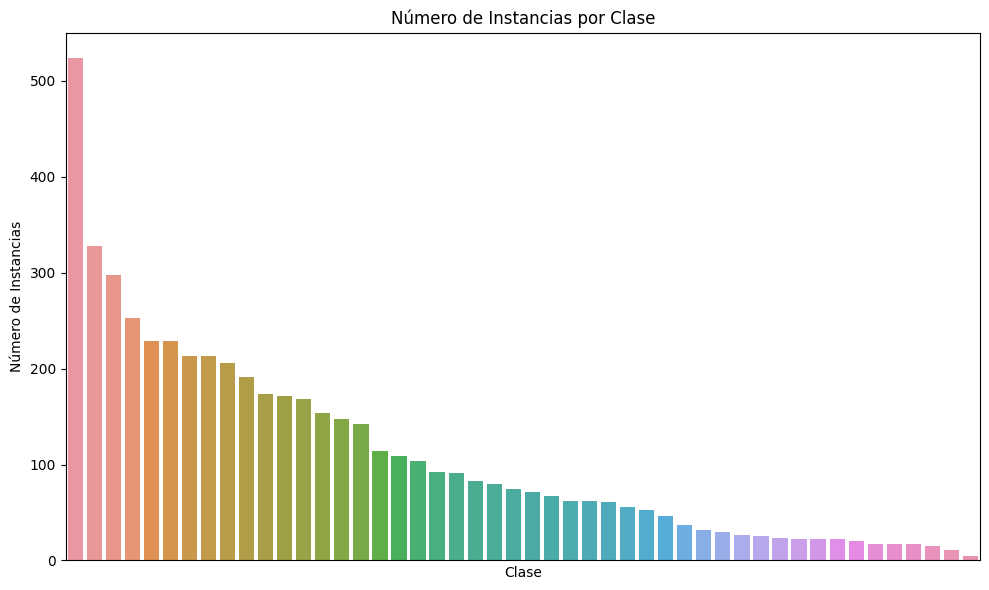

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# value_counts() para contar el número de instancias por clase,
clase_counts = datos_df['gs_text34'].value_counts()

# GRAFICAR
# Configura el tamaño del gráfico
plt.figure(figsize=(10, 6))

 # Ajusta el valor de 'capsize' para controlar la separación
sns.barplot(x=clase_counts.index, y=clase_counts.values, capsize=3)

# Personaliza el tamaño del texto en el eje X
# Ajusta el valor de 'fontsize' para cambiar el tamaño del texto en el eje X

plt.title('Número de Instancias por Clase')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.xticks(rotation=45, fontsize=10)

# Para que se muestren todas las etiquetas
plt.tight_layout()

plt.show()

In [4]:
# unique() para identificar las clases únicas
clases_unicas = datos_df['gs_text34'].unique()

clases_unicas.shape[0] # Número de clases

48

In [10]:
clase_counts.head(5) # Las 5 clases más recurrentes

Pneumonia                          524
Stillbirth                         328
Stroke                             298
Other Non-communicable Diseases    253
Preterm Delivery                   229
Name: gs_text34, dtype: int64

In [5]:
clases_unicas

array(['Pneumonia', 'Maternal', 'Other Injuries',
       'Bite of Venomous Animal', 'Stillbirth', 'Other Cancers', 'Stroke',
       'Other Non-communicable Diseases', 'Other Infectious Diseases',
       'Malaria', 'Acute Myocardial Infarction', 'Suicide',
       'Cervical Cancer', 'Preterm Delivery',
       'Other Cardiovascular Diseases', 'Congenital malformation',
       'Sepsis', 'AIDS', 'Road Traffic', 'Cirrhosis', 'Falls',
       'Diarrhea/Dysentery', 'Leukemia/Lymphomas', 'Renal Failure',
       'Fires', 'Diabetes', 'Birth asphyxia', 'Poisonings', 'TB',
       'Other Defined Causes of Child Deaths', 'Meningitis', 'COPD',
       'Drowning', 'Colorectal Cancer', 'Other Digestive Diseases',
       'Measles', 'Homicide', 'Breast Cancer', 'Hemorrhagic fever',
       'Encephalitis', 'Epilepsy', 'Lung Cancer', 'Violent Death',
       'Prostate Cancer', 'Stomach Cancer', 'Esophageal Cancer',
       'Meningitis/Sepsis', 'Asthma'], dtype=object)

In [9]:
mapeo = {
    "0":    ["Diarrhea/Dysentery", "Other infectious diseases", "AIDS", "Sepsis", "Meningitis", "Meningitis/Sepsis", "Malaria", "Encephalitis", "Measles", "Hemorrhagic Fever", "TB"],
    "1":    ["Leukemia/Lymphomas", "Colorectal Cancer", "Lung Cancer", "Cervical Cancer", "Breast Cancer", "Stomach Cancer", "Prostate Cancer", "Esophageal Cancer", "Other Cancers"],
    "2":    ["Diabetes"],
    "3":    ["Epilepsy"],
    "4":    ["Stroke"],
    "5":    ["Acute Myocardial Infarction"],
    "6":    ["Pneumonia", "Asthma", "COPD"],
    "7":    ["Cirrhosis", "Other Digestive Diseases"],
    "8":    ["Renal Failure"],
    "9":    ["Preterm Delivery", "Stillbirth", "Maternal", "Birth Asphyxia"],
    "10":   ["Congenital Malformations"],
    "11":   ["Bite of Venomous Animal", "Poisonings"],
    "12":   ["Road Traffic", "Falls", "Homicide", "Fires", "Drowning", "Suicide", "Violent Death", "Other injuries"]
}
# Convertir el diccionario de mapeo original a minúsculas
mapeo = {etiqueta.lower(): [clase.lower() for clase in clases] for etiqueta, clases in mapeo.items()}

# Función personalizada para mapear
def mapear_etiqueta(clase):
    for etiqueta, clases_lista in mapeo.items():
        if clase in clases_lista:
            return etiqueta
    return None

datos_df['gs_text34'] = datos_df['gs_text34'].str.lower()
datos_df['clases'] = datos_df['gs_text34'].apply(mapear_etiqueta)

In [10]:
datos_df.head(5)

,newid,module,age,sex,site,open_response,gs_text34,clases
0,1578,Adult,65.0,1,Bohol,date he felt a lower back pain and had fever s...,pneumonia,6
1,1865,Child,0.0,2,Dar,the caese of death is pneumonia,pneumonia,6
2,3667,Adult,23.0,2,AP,i took my wife to a private hospital for tubec...,maternal,9
3,452,Adult,40.0,1,AP,he went to the work on sunday there were # iro...,other injuries,12
4,2904,Adult,55.0,1,UP,the deceased had died due to a snake bite the ...,bite of venomous animal,11


In [12]:
conteo_none = (datos_df['clases'] == 'None').sum()
conteo_none

0

## Vectorización

In [7]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import simple_preprocess


# Funciones útiles
def preprocesado(texto):
    # PRE: Un texto
    # POST: Tockens del texto preprocesado
    return simple_preprocess(texto)

def train_docModel(texts, model_file):
    # PRE: una lista de documentos y el path del modelo resultante
    # POST: el modelo doc-embeddings entrenado
    # Inicializamos y entrenamos un modelo Doc2Vec
    documents = [TaggedDocument(preprocesado(doc), [i]) for i, doc in enumerate(texts)]

    model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

    # Guardamos el modelo
    model.save(model_file)


def vec_docEmbeddings(docs, model):
    # PRE: una lista de documentos y el modelo de doc-embeddings
    # POST: lista de (id, vector)
    for i, line in enumerate(docs):
        # Preprocesado del documento
        tokens = preprocesado(line)
        # Vectorizamos -> indice, vector
        yield (i, model.infer_vector(tokens))
        

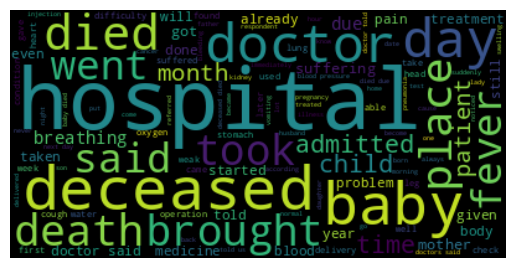

In [9]:
# Word Cloud
import wordcloud

# Tomar todas las palabras del data set 
text = " ".join(doc for doc in datos_df['open_response'])

# Crear una imagen de word cloud
wordcloud = wordcloud.WordCloud().generate(text)

# Mostrar la imagen
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

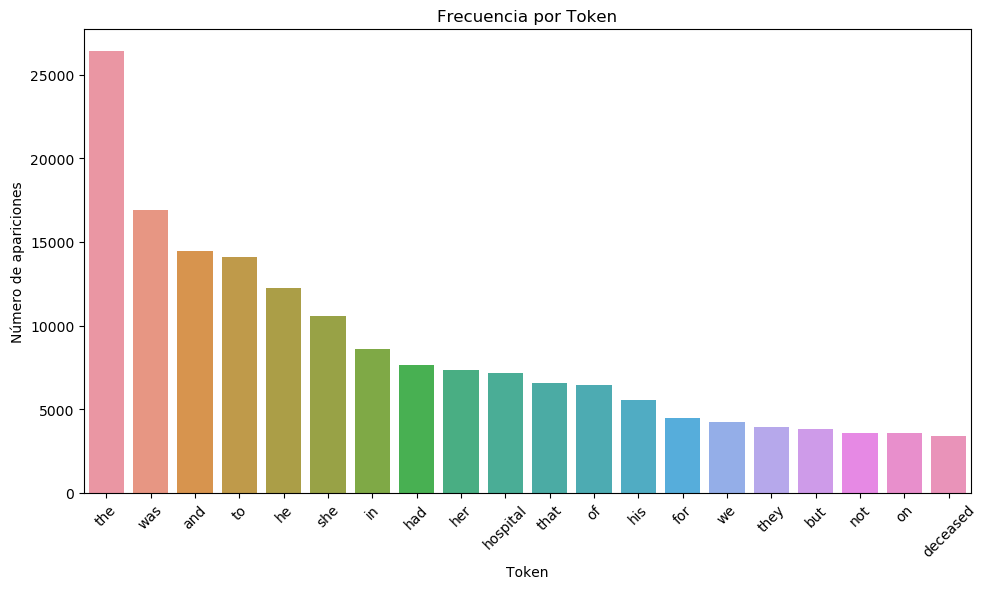

In [10]:
# Estudio del texto preprocesado
import numpy as np
import pandas as pd

tokens = preprocesado(text)
a = np.array(tokens)
unique, counts = np.unique(a, return_counts=True)
tokens_dict = dict(zip(unique, counts))

tokens_frec = pd.DataFrame(tokens_dict.items(), columns=['Text', 'Frec'])
tokens_frec = tokens_frec.sort_values(by=['Frec'], ascending=False)
tokens_frec = tokens_frec.head(20) # los 10 tokens más frecuentes

# GRAFICAR
# Configura el tamaño del gráfico
plt.figure(figsize=(10, 6))

 # Ajusta el valor de 'capsize' para controlar la separación
sns.barplot(x=tokens_frec['Text'].values, y=tokens_frec['Frec'].values, capsize=3)

# Personaliza el tamaño del texto en el eje X
# Ajusta el valor de 'fontsize' para cambiar el tamaño del texto en el eje X

plt.title('Frecuencia por Token')
plt.xlabel('Token')
plt.ylabel('Número de apariciones')
plt.xticks(rotation=45, fontsize=10)

# Para que se muestren todas las etiquetas
plt.tight_layout()

plt.show()

In [11]:
# Tamaño del diccionario
len(unique)

9275

In [32]:
# Para entrenar con otros vocabularios
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [56]:
# Entrenamos el modelo
train_docModel(pd.read_csv(train_file)['open_response'], model_file)

In [78]:
# Cargamos el modelo
model = Doc2Vec.load(model_file)
# model = gensim.downloader.load('glove-twitter-25')

# Cargamos los datos
train_df = pd.read_csv(train_file)


# Obtenemos la vectorizacion de los documentos [(index, vector)]
train_vecs = list(vec_docEmbeddings(train_df["open_response"], model))
train_corpus = [vec[1] for vec in train_vecs]

In [79]:
# Aplicar PCA a los vectores resultantes
from sklearn.decomposition import PCA

print('Dimensiones originales: 500')
# Reducir las dimensiones para visualizarlas: PCA
pca = PCA(n_components=2)
pca.fit(train_corpus)
# Cambio de base a dos dimensiones PCA 
x_train_PCAspace = pca.transform(train_corpus)
print('Dimensiones después de aplicar PCA: 200')

Dimensiones originales: 500
Dimensiones después de aplicar PCA: 200
